# Decide on final functions for creating boundary conditions

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import sys
sys.path.append('/home/users/birgal/')
import pickle
from nemo_python_git.utils import fix_lon_range, convert_to_teos10, rotate_vector
from nemo_python_git.interpolation import regrid_array_cf, regrid_operator_cf
from nemo_python_git.ics_obcs import fill_ocean
from nemo_python_git.forcing import find_cesm2_file

In [2]:
base_folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [3]:
nemo_mesh = xr.open_dataset(f'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc')

## Adjust SOSE boundary condition masking to make sure it's the right point:

In [4]:
folder_bc = f'{base_folder}boundary-conditions/B-SOSE/'

for var in ['AbsSal','ConsTemp','SeaIceHeff','SeaIceArea','SeaIceHsnow','Uvel','Vvel','SSH']:
    for month in range(1,13):
        old_bc = xr.open_dataset(f'{folder_bc}SOSE-{var}-boundary-conditions-20240507_m{month:02}.nc').drop_vars(['x','y'])
        
        if var == 'SeaIceHeff': varname='SIheff'
        elif var == 'SeaIceHsnow': varname='SIhsnow'
        elif var == 'SeaIceArea': varname='SIarea'
        elif var == 'Uvel': varname='UVEL'
        elif var == 'Vvel': varname='VVEL'
        else: varname=var

        # if var in ['AbsSal', 'ConsTemp']:
        #     old_bc[varname] = xr.where(old_bc[varname]==0, 9999, old_bc[varname]).roll(x=1)
        # else:
        old_bc[varname] = old_bc[varname].roll(x=1)

        old_bc.to_netcdf(f'{folder_bc}SOSE-{var}-boundary-conditions-20240910_m{month:02}.nc')

In [8]:
bdy_folder = f'{base_folder}boundary-conditions/B-SOSE/'
date='20250219'
bc_temp = xr.open_dataset(f'{bdy_folder}SOSE-ConsTemp-boundary-conditions-{date}_m01.nc')['ConsTemp'].isel(time_counter=0,y=0)
bc_sal  = xr.open_dataset(f'{bdy_folder}SOSE-AbsSal-boundary-conditions-{date}_m01.nc')['AbsSal'].isel(time_counter=0,y=0)
bc_ssh  = xr.open_dataset(f'{bdy_folder}SOSE-SSH-boundary-conditions-{date}_m01.nc')['SSH'].isel(time_counter=0,y=0)
bc_uvel = xr.open_dataset(f'{bdy_folder}SOSE-UVEL-boundary-conditions-{date}_m01.nc')['UVEL'].isel(time_counter=0,y=0)
bc_vvel = xr.open_dataset(f'{bdy_folder}SOSE-VVEL-boundary-conditions-{date}_m01.nc')['VVEL'].isel(time_counter=0,y=0)
bc_snow = xr.open_dataset(f'{bdy_folder}SOSE-SIhsnow-boundary-conditions-{date}_m01.nc')['SIhsnow'].isel(time_counter=0,y=0)
bc_area = xr.open_dataset(f'{bdy_folder}SOSE-SIarea-boundary-conditions-{date}_m01.nc')['SIarea'].isel(time_counter=0,y=0)
bc_heff = xr.open_dataset(f'{bdy_folder}SOSE-SIheff-boundary-conditions-{date}_m01.nc')['SIheff'].isel(time_counter=0,y=0)

In [25]:
bc_temp['deptht'] = dsT.deptht

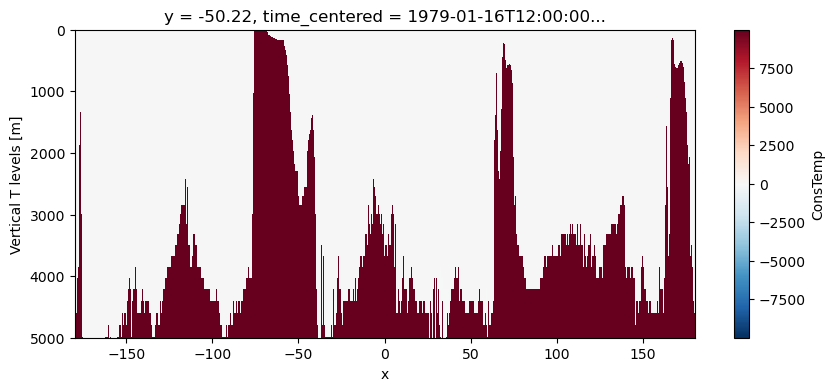

In [26]:
bc_temp.sortby('x').plot(figsize=(10,4), ylim=(5000,0))

In [55]:
dsT1 = xr.open_dataset(f'{base_folder}output/bdy_test/files0/eANT025.L121_1m_19790101_19791231_grid_T.nc').isel(time_counter=2)
dsT = xr.open_dataset(f'{base_folder}output/ERA5_test10/files_spinup/eANT025.L121_1m_19790101_19791231_grid_T.nc').isel(time_counter=2)

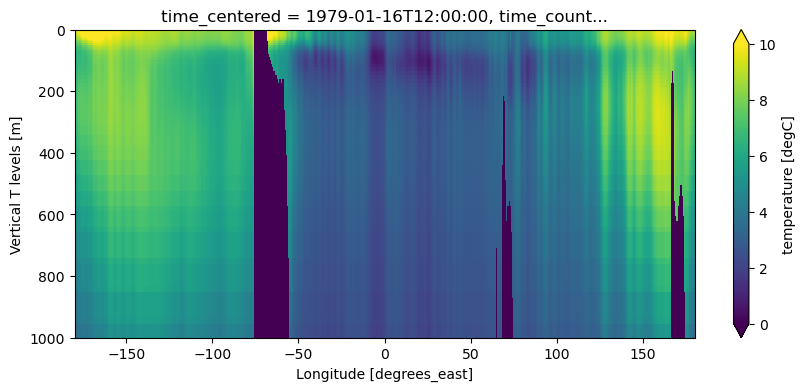

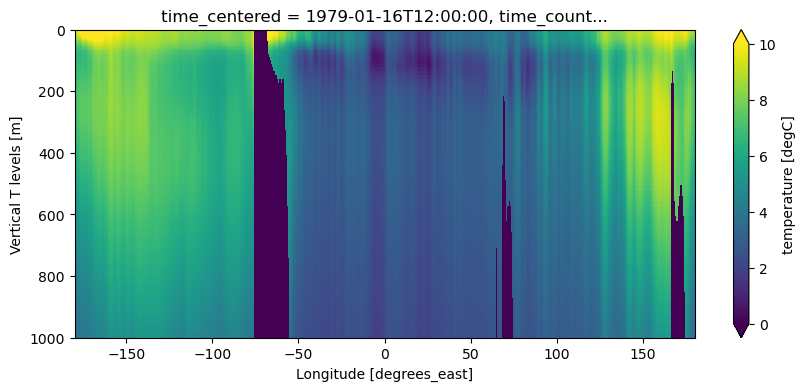

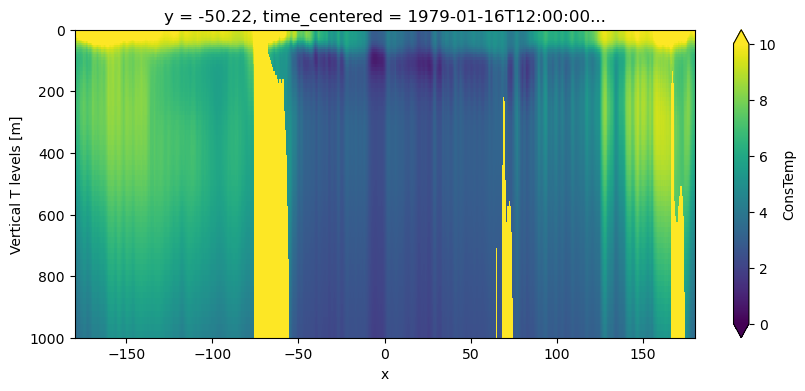

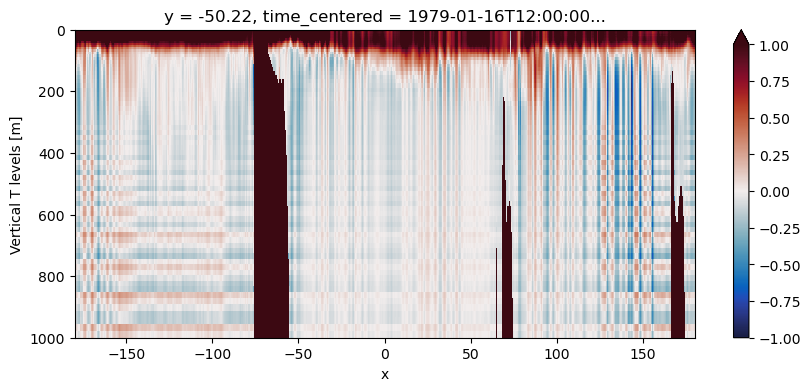

In [48]:
zlim=1000
dsT.thetao.isel(y_grid_T=-2).sortby('x_grid_T').plot(figsize=(10,4), ylim=(zlim,0), vmin=0, vmax=10)
dsT1.thetao.isel(y_grid_T=-2).sortby('x_grid_T').plot(figsize=(10,4), ylim=(zlim,0), vmin=0, vmax=10)
bc_temp.sortby('x').plot(figsize=(10,4), ylim=(zlim,0), vmin=0, vmax=10)


(bc_temp.sortby('x') - dsT.thetao.isel(y_grid_T=-2).rename({'x_grid_T':'x'}).sortby('x')).plot(figsize=(10,4), ylim=(zlim,0), 
                                                                                               vmin=-1, vmax=1, cmap=cmocean.cm.balance)

In [5]:
bdy_folder = f'{base_folder}boundary-conditions/B-SOSE/'
bc_temp2 = xr.open_dataset(f'{bdy_folder}SOSE-ConsTemp-boundary-conditions-20240911_m01.nc')['ConsTemp'].isel(time_counter=0,y=0).drop_vars(['x','y'])
bc_sal2  = xr.open_dataset(f'{bdy_folder}SOSE-AbsSal-boundary-conditions-20240911_m01.nc')['AbsSal'].isel(time_counter=0,y=0).drop_vars(['x','y'])
bc_ssh2  = xr.open_dataset(f'{bdy_folder}SOSE-SSH-boundary-conditions-20240911_m01.nc')['SSH'].isel(time_counter=0,y=0).drop_vars(['x','y'])

In [6]:
(bc_ssh - bc_ssh2).max()

<xarray.DataArray 'SSH' ()> Size: 8B
array(0.)

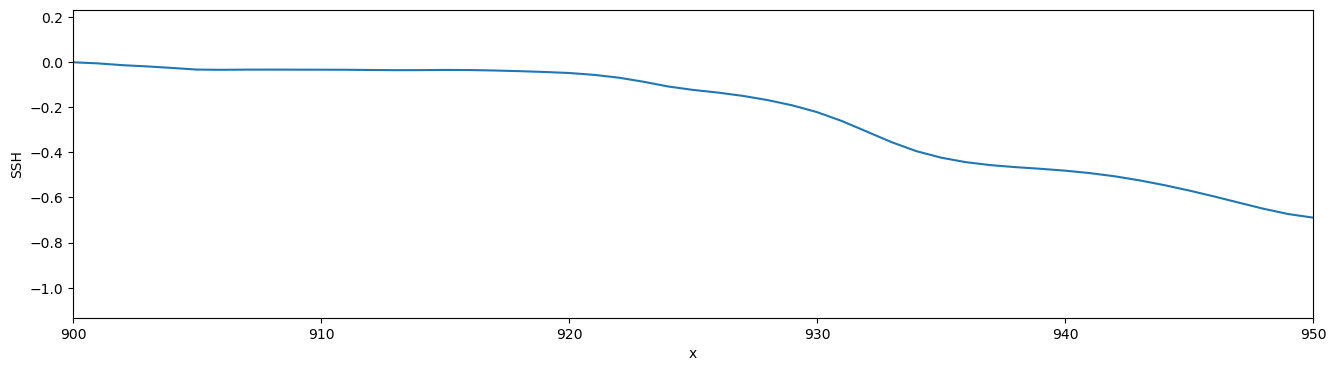

In [22]:
bc_ssh.plot(figsize=(16,4), xlim=(900,950))

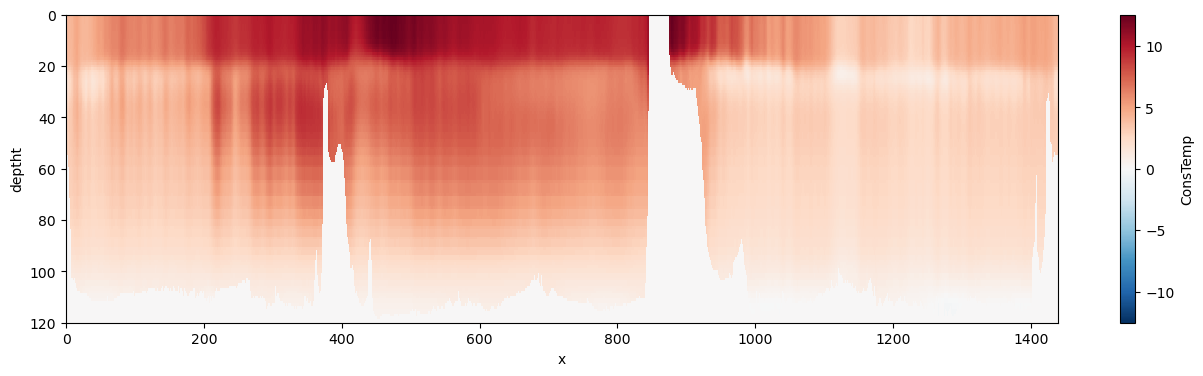

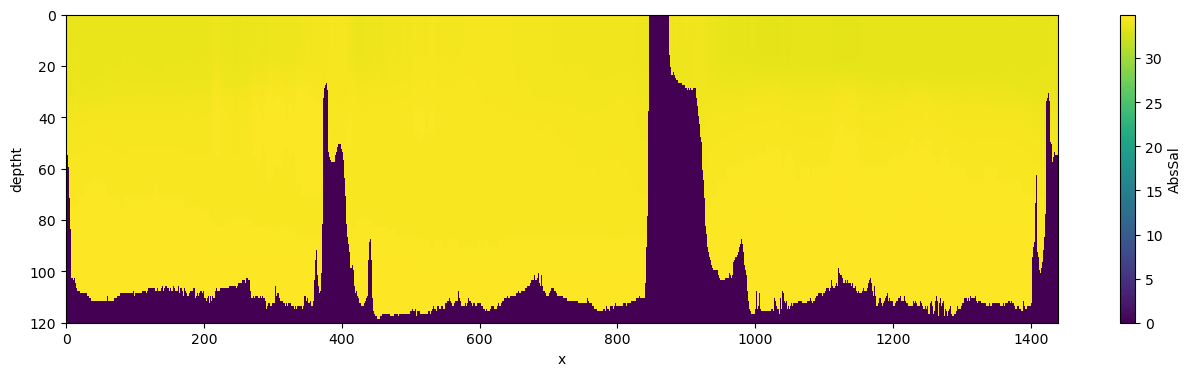

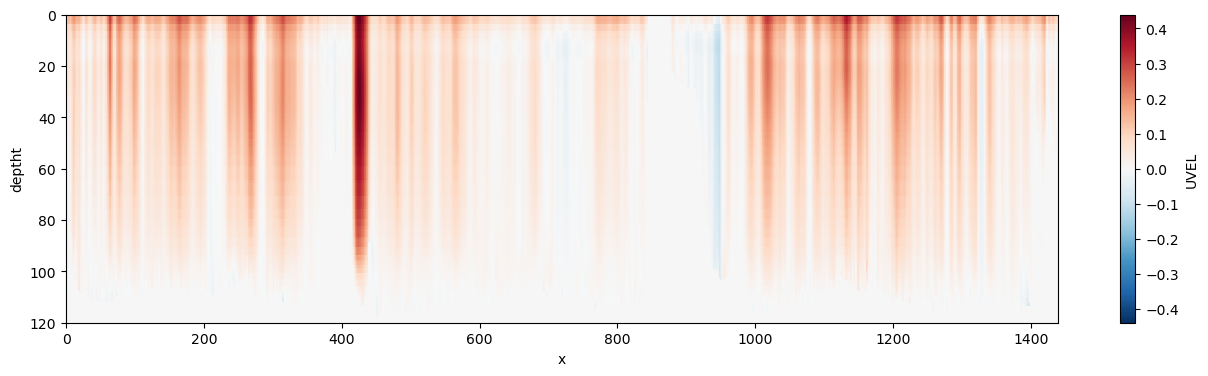

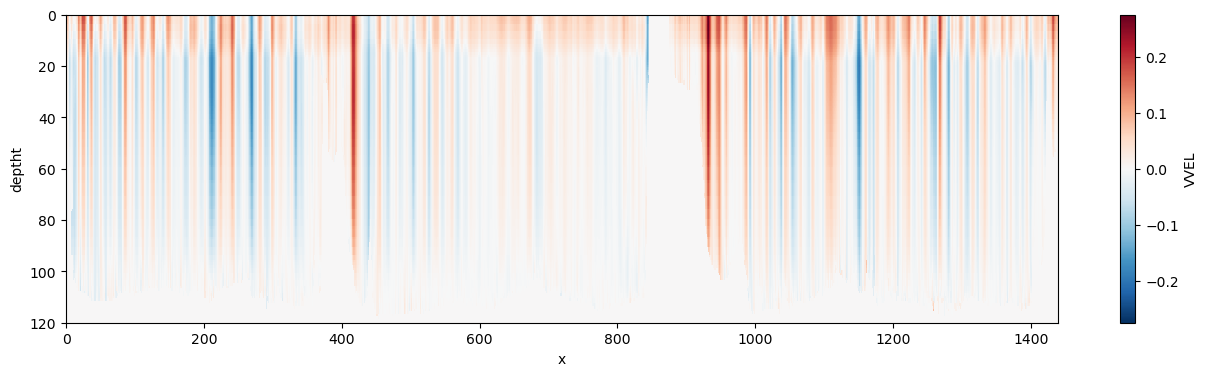

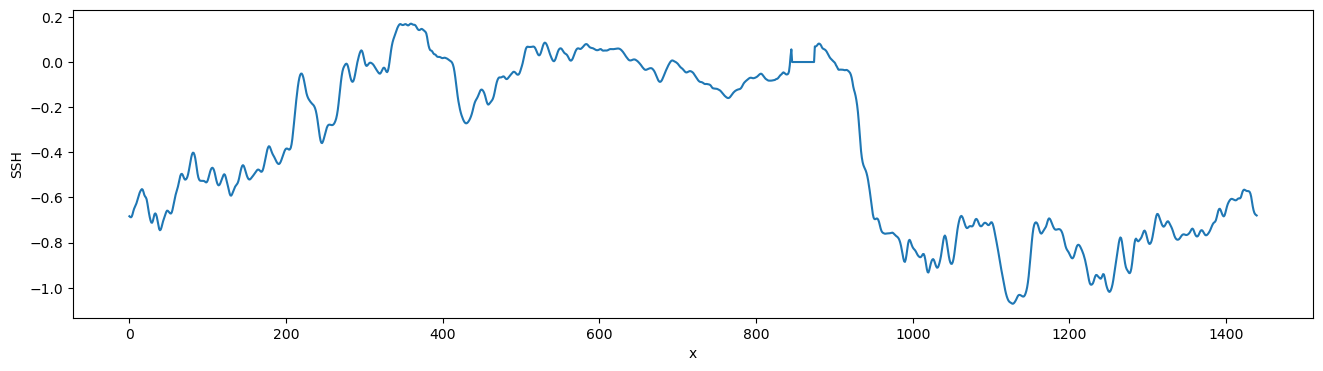

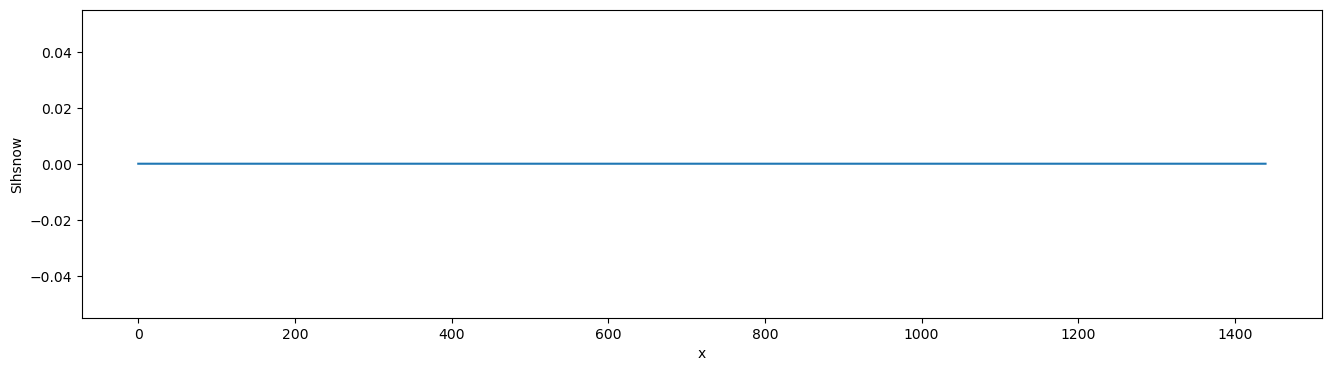

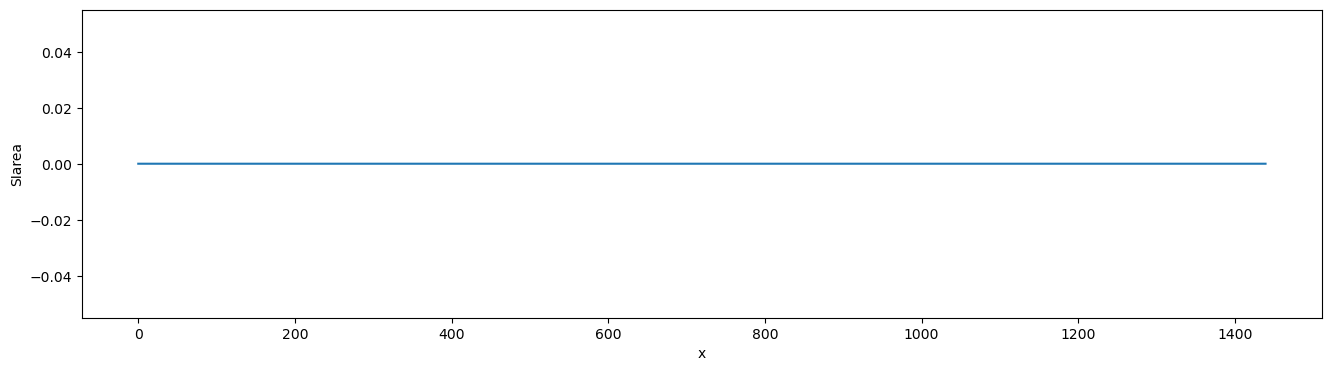

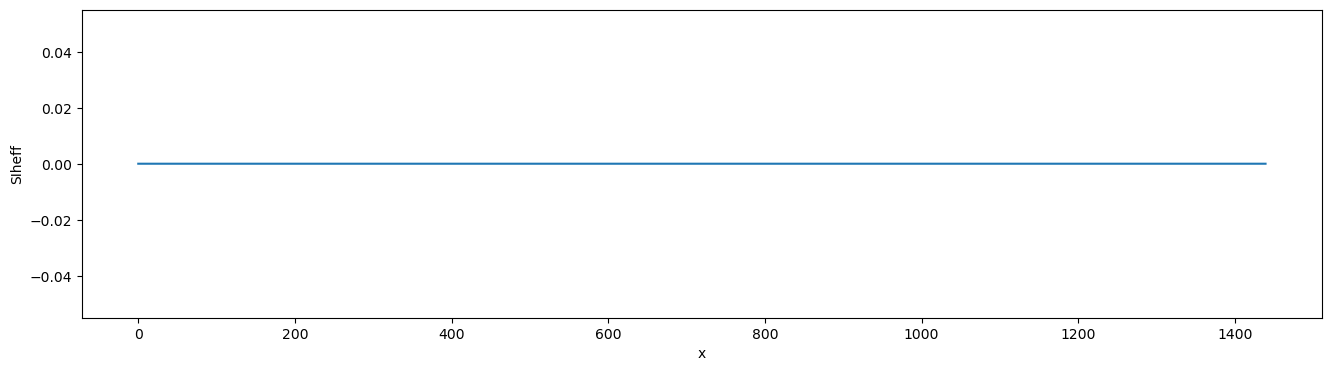

In [7]:
bc_temp.plot(figsize=(16,4), ylim=(120,0))
bc_sal.plot(figsize=(16,4), ylim=(120,0))
bc_uvel.plot(figsize=(16,4), ylim=(120,0))
bc_vvel.plot(figsize=(16,4), ylim=(120,0))
bc_ssh.plot(figsize=(16,4))
bc_snow.plot(figsize=(16,4))
bc_area.plot(figsize=(16,4))
bc_heff.plot(figsize=(16,4))

In [28]:
# old_bc   = xr.open_dataset(f'{base_folder}boundary-conditions/B-SOSE/SOSE-AbsSal-boundary-conditions-20240507_m01.nc').drop_vars(['x','y'])
var = 'AbsSal'
old_bc   = xr.open_dataset(f'{base_folder}boundary-conditions/B-SOSE/SOSE-{var}-boundary-conditions-20240910_m01.nc')
cesm2_bc = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_{var}_test9_y1850m02.nc')
# old_bc   = xr.open_dataset(f'{base_folder}boundary-conditions/B-SOSE/SOSE-Vvel-boundary-conditions-20240910_m01.nc')
# cesm2_bc = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_VVEL_test9_y1850m02.nc')

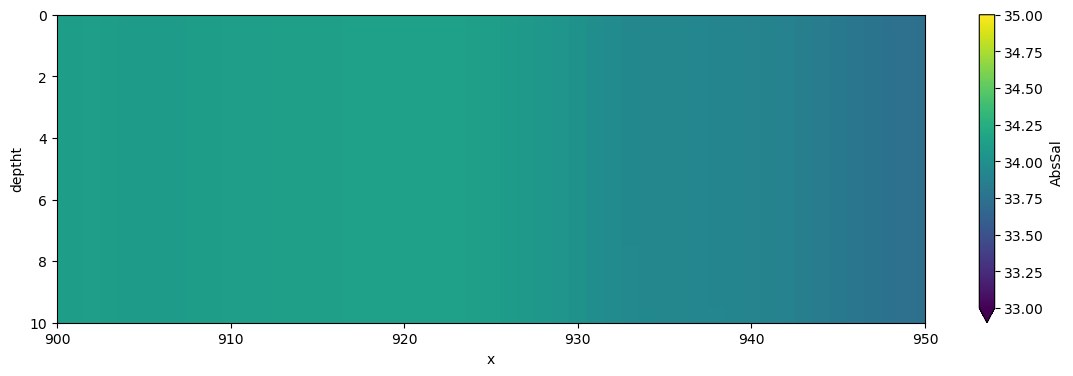

In [29]:
# old_bc['AbsSal'] = xr.where(old_bc['AbsSal']==0, 9999, old_bc['AbsSal']).roll(x=1)
old_bc.isel(time_counter=0, y=0)['AbsSal'].plot(figsize=(14,4), ylim=(10, 0), vmin=33, vmax=35, xlim=(900, 950))

In [9]:
# old_bc['AbsSal'] = xr.where(old_bc['AbsSal']==0, 9999, old_bc['AbsSal']).roll(x=1)
(old_bc.isel(time_counter=0, y=0) - cesm2_bc.isel(time_counter=0, y=0))['VVEL'].plot(figsize=(14,4), ylim=(120, 0), 
                                                                                      vmin=-1, vmax=1, cmap=cmocean.cm.balance)

KeyError: "No variable named 'VVEL'. Variables on the dataset include ['AbsSal']"

### Rotate velocity vectors
Grid seems exactly east-west/north south at the northern boundary, so I don't seem to need to worry about the rotation

In [6]:
domcfg = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/domain_cfg-20240305.nc')
# u = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/boundary-conditions/B-SOSE/SOSE-Uvel-boundary-conditions-20240507_m01.nc')['UVEL'].isel(time_counter=0)
# v = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/boundary-conditions/B-SOSE/SOSE-Vvel-boundary-conditions-20240507_m01.nc')['VVEL'].isel(time_counter=0)
u = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files/eANT025.L121_1m_20000101_20001231_grid_U.nc')['uo'].isel(time_counter=0)
v = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test6/files/eANT025.L121_1m_20000101_20001231_grid_V.nc')['vo'].isel(time_counter=0)
u_rot_rev, v_rot_rev = rotate_vector(u, v, domcfg, gtype='T', periodic=True, halo=True, return_angles=False, reverse=False)
u_rot, v_rot = rotate_vector(u_rot_rev, v_rot_rev, domcfg, gtype='T', periodic=True, halo=True, return_angles=False, reverse=True)

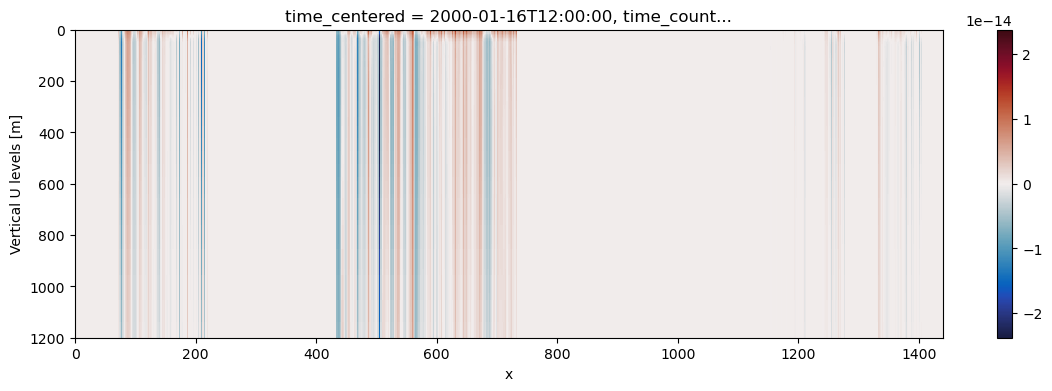

In [39]:
(u.isel(y=slice(450,451)).rename({'depthu':'deptht'}) - u_rot_rev.isel(y=slice(450,451))).plot(figsize=(14,4), cmap=cmocean.cm.balance, ylim=(1200,0))

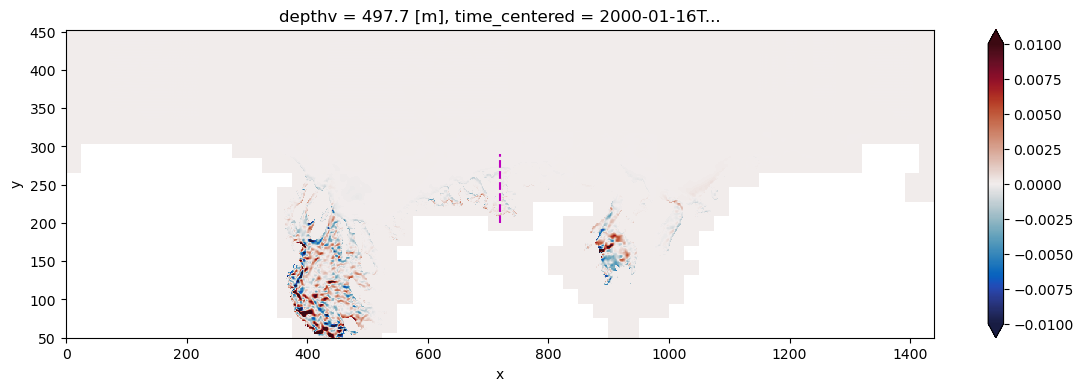

In [31]:
xind=720; yindl=200; yindu=290; zind=50;

fig, ax = plt.subplots(1,1, figsize=(14,4))
(v.isel(depthv=zind) - v_rot_rev.isel(deptht=zind)).plot(ax=ax,vmin=-1e-2,vmax=1e-2, cmap=cmocean.cm.balance, ylim=(50,None))
ax.plot([xind,xind],[yindl, yindu],'--m')

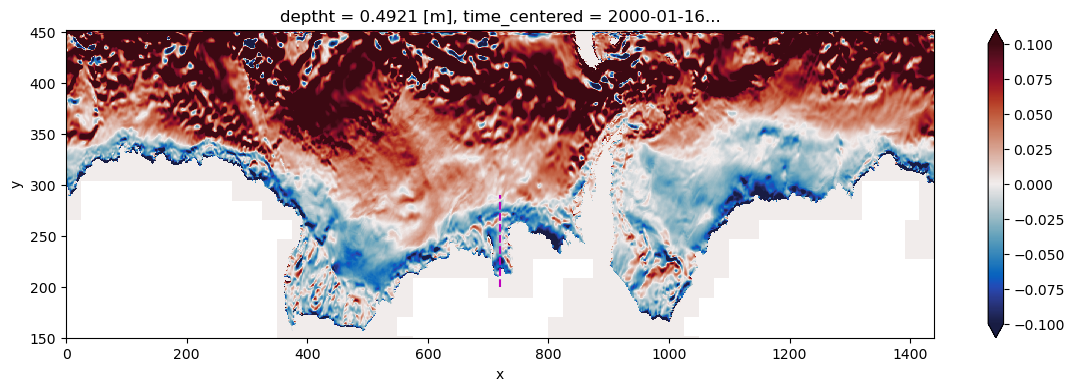

In [126]:
xind=720; yindl=200; yindu=290;

fig, ax = plt.subplots(1,1, figsize=(14,4))
u_rot_rev.isel(deptht=0).plot(ax=ax,vmin=-0.1,vmax=0.1, cmap=cmocean.cm.balance, ylim=(150,None))
ax.plot([xind,xind],[yindl, yindu],'--m')

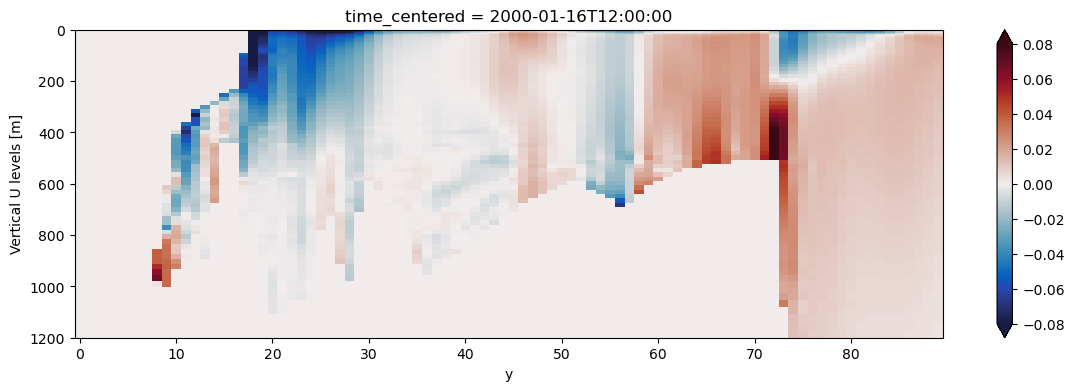

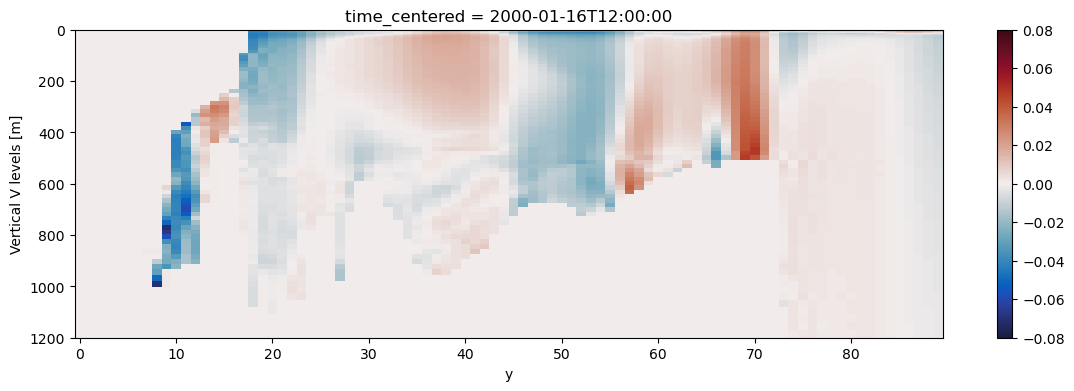

In [127]:
u_rot_rev.isel(x=xind, y=slice(yindl,yindu)).plot(figsize=(14,4),vmin=-0.08,vmax=0.08, cmap=cmocean.cm.balance, ylim=(1200,0))
v_rot_rev.isel(x=xind, y=slice(yindl,yindu)).plot(figsize=(14,4),vmin=-0.08,vmax=0.08, cmap=cmocean.cm.balance, ylim=(1200,0))

## Based on old approach

In [ ]:
def interp_depth(source, source_edges, nemo_edges, n):
    # For a particular input nemo depth level, interpolate from source grid to nemo grid (conservatively nearest-neighbour)

    NEMO_top_edge = nemo_edges[0][n,:,:]; NEMO_bot_edge = nemo_edges[2][n,:,:];

    dataset = xr.Dataset({}) #.assign_coords(x=source.x, y=source.y)

    for var in source: # loop over the variables in the source dataset
        # find the source edges that fall within the depth ranges of the NEMO grid cells and weight source variable by depth
        Var_total = np.zeros(NEMO_top_edge.shape);
        for zs in range(0,source.z.size):
            src_top_edge = source_edges[0][zs,:,:]; src_bot_edge = source_edges[2][zs,:,:];

            # NEMO cells that fall fully within the source cell:
            Var = 0

            Var = xr.where((NEMO_top_edge >= src_top_edge)*(NEMO_bot_edge <= src_bot_edge), \
                           source.isel(z=zs)*(NEMO_bot_edge - NEMO_top_edge), 0)

            # NEMO cells that have an overlap at the bottom: 
            Var = xr.where((NEMO_top_edge <= src_bot_edge)*(NEMO_bot_edge >= src_bot_edge)*(NEMO_top_edge >= src_top_edge), \
                           source.isel(z=zs)*(src_bot_edge - NEMO_top_edge), Var)

            # NEMO cells that have an overlap at the top:
            Var = xr.where((NEMO_top_edge < src_top_edge)*(NEMO_bot_edge >= src_top_edge)*(NEMO_bot_edge < src_bot_edge), \
                           source.isel(z=zs)*(NEMO_bot_edge - src_top_edge), Var)

            # source cell smaller than NEMO cell and fully encapsulated:
            Var = xr.where((NEMO_top_edge <= src_bot_edge)*(NEMO_bot_edge >= src_bot_edge)*(NEMO_top_edge < src_top_edge)*(NEMO_bot_edge <= np.max(source_edges[2])), \
                           Var + source.isel(z=zs)*(src_bot_edge - src_top_edge), Var)

            Var_total += Var

        # If the NEMO cell is deeper than the maximum source depth, fill cell with NaN so that fill_ocean can deal with it later
        Var_total    = xr.where((NEMO_bot_edge > np.max(source_edges[2][~np.isnan(source[var])], axis=0)), \
                                 np.nan, Var_total)

        # Remove depth weighting
        Var_total    = Var_total/(NEMO_bot_edge - NEMO_top_edge)
        dataset[var] = (('y', 'x'), Var_total[var].values)

    return dataset

In [ ]:
def fill_ocean(input_dataset, variable, nemo_mask, missing_val=-9999, fill_val=np.nan, niter=100, dim='3D', grid='T'):

    print('Filling gaps with connected nearest neighbours')
    if grid=='T': gridmask=nemo_mask.tmask
    elif grid=='U': gridmask=nemo_mask.umask
    elif grid=='V': gridmask=nemo_mask.vmask
    else: print('Must specify grid as type T, U, or V')

    if dim=='3D':
        use_3d=True; use_2d=False;
        nemo_ocn = (gridmask.isel(time_counter=0).values == 1)
        # might need to fix the nemo mask at the deepest cell to fill that cell as well
    elif dim=='2D':
        use_2d=True; use_3d=False;
        nemo_ocn = (gridmask.isel(time_counter=0, nav_lev=0).values == 1)

    # Fill gaps in source dataset with nearest neighbour
    src_to_fill = xr.where(np.isnan(input_dataset[variable].values)*nemo_ocn, missing_val, input_dataset[variable].values)
    var_filled  = extend_into_mask(src_to_fill, missing_val=missing_val, fill_val=fill_val, use_2d=use_2d, use_3d=use_3d, num_iters=niter)

    # Remove any points with values that are actually in the land
    var_filled = xr.where(~nemo_ocn, np.nan, var_filled)

    if dim=='3D':   input_dataset[variable] = (('z','y','x'), var_filled)
    elif dim=='2D': input_dataset[variable] = (('y','x')    , var_filled)

    return input_dataset

In [ ]:
def vertical_interp(interp_info, in_file, out_file, ln_obcs=False, bdy_ind=-2):

    # Load horizontally interpolated variable:
    hinterp_var = xr.open_dataset(f'{in_file}')

    # Find edges of the NEMO and source dataset vertical levels: 
    nemo_mask_file    = xr.open_dataset(f"{interp_info['nemo_mask']}")
    source_coord_file = xr.open_dataset(f"{interp_info['source_coord']}")
    if ln_obcs:
        bdy_lat           = nemo_mask_file.nav_lat.isel(y=bdy_ind).max().values
        nemo_mask_file    = nemo_mask_file.isel(y=[bdy_ind])
        source_coord_file = source_coord_file.rename(interp_info['renaming']).sel(lat=slice(bdy_lat-1, bdy_lat+1))

    if interp_info['source']=='SOSE':
       source_coord   = hinterp_var.assign(drF=(['z'], source_coord_file.drF.values))
    elif interp_info['source']=='CESM2':
       source_coord   = hinterp_var.assign(dz=(['z_t'], source_coord_file.dz.values)) ### add the coorect variable

    nemo_edges        = vertical_edges(nemo_mask_file, mtype='nemo')
    source_edges      = vertical_edges(source_coord, mtype=interp_info['source'])

    # Loop over vertical NEMO levels to interpolate slices from the source dataset:
    print(f"Vertically interpolating variable {interp_info['variable']}")
    model_ICs = []
    for n in tqdm.tqdm(range(len(nemo_mask_file.nav_lev.values))):
        data_interp = interp_depth(hinterp_var, source_edges, nemo_edges, n)
        model_ICs.append(data_interp) # Add interpolated layers to dataset

    source_interp = xr.concat(model_ICs, dim='z')

    # write to file
    source_interp.to_netcdf(f'{out_file}')

    return

In [ ]:
def preprocess_obcs(in_file, renaming={}):

    # Read variable and slice to the latitude range of interest to reduce size
    source_var = xr.open_dataset(f'{in_file}').rename(interp_info['renaming']).sel(lat=slice(-90, -48))
    if source_var.lon.max() > 180: # Convert longitudes from 0-360 to -180 to 180 
        source_var['lon'] = fix_lon_range(source_var.lon)
        source_var        = source_var.sortby('lon')

# convert temperature and salinity values to TEOS10:
    if interp_info['variable'] == 'PracSal':
        print(f"Converting {interp_info['variable']} to TEOS10")
        source_converted = convert_to_teos10(source_var, var=interp_info['variable'])
    elif interp_info['variable'] == 'PotTemp':
        print(f"Converting {interp_info['variable']} to TEOS10")
        print('Note: to convert potential temperature to conservative temperature, TEOS10 uses salinity. Make sure a salinity file is specified.')
        source_salt        = xr.open_dataset(f"{interp_info['salt_file']}").rename(interp_info['renaming']).sel(lat=slice(bdy_lat-1, bdy_lat+1))
        source_salt['lon'] = fix_lon_range(source_salt.lon)
        source_salt        = source_salt.sortby('lon')
        source_dataset     = source_var.assign(AbsSal = source_salt['PracSal']) # source_var.assign(PracSal=source_salt['PracSal'])
        source_converted   = convert_to_teos10(source_dataset, var=interp_info['variable'])
    else:
        print("Proceeding under the assumption that conservative temperature and/or absolute salinity were provided")
        source_converted   = source_var[interp_info['variable']]

    return

In [23]:
def mask_SOSE_variable(variable, source_var, source_converted, depth_level=0, dim='3D'):

    if variable=='UVEL': # must be 3d
        var_source = xr.where(source_var.maskW.isel(depth=depth_level)==1, source_converted.isel(depth=depth_level), np.nan)
        var_source = xr.where(var_source==0, np.nan, var_source) # needed to mask a couple of missing land points
    elif variable=='VVEL':
        var_source = xr.where(source_var.maskS.isel(depth=depth_level)==1, source_converted.isel(depth=depth_level), np.nan)
        var_source = xr.where(var_source==0, np.nan, var_source) # needed to mask a couple of missing land points
    else:
        # Mask values that are on land in the source dataset
        if dim=='3D':
            var_source = xr.where(source_var.maskC.isel(depth=depth_level)==1, source_converted.isel(depth=depth_level), np.nan)
            var_source = xr.where(var_source==0, np.nan, var_source) # needed to mask a couple of missing land points
        elif dim=='2D':
            var_source = xr.where(source_converted==0, np.nan, source_converted)
            var_source = xr.where((source_var.maskInC == 1) & np.isnan(var_source), 0, var_source)
            var_source = xr.where(source_var.maskInC == 1, var_source, np.nan)
    return var_source

In [7]:
ds = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/coordinates_AIS.nc')

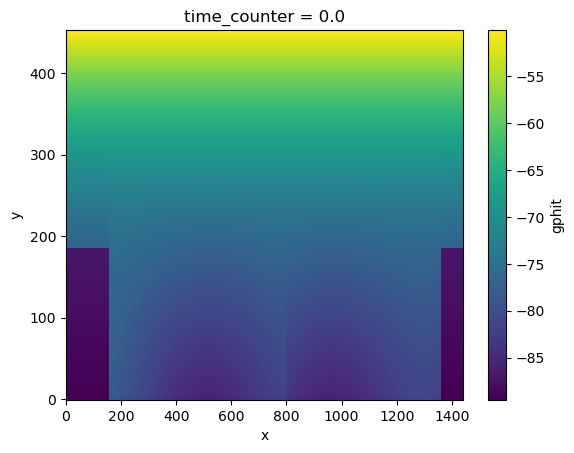

In [9]:
ds.isel(time_counter=0).gphit.plot()

In [22]:
# Given an array of grid values on the edges (gtype=u, v) or corners (gtype=f) of the grid, extend by one column to the west and/or row
# to the south so that all of the tracer points have edges defined on both sides. Note that the index convention of the resulting array 
# will change relative to the tracer grid. A t-point (j,i) at the centre of the cell originally has the corresponding f-point (j,i) to 
# the northeast corner of the cell, but after this padding of the f-grid, the corresponding f-point (j,i) will be at the southwest corne of the cell.
# This should also work if "array" is a Dataset instead of a DataArray.
def extend_grid_edges (array, gtype, periodic=True, halo=False):

    if gtype in ['u', 'f']:
        # New column to the west
        if periodic:
            # The western edge already exists on the other side
            if halo:
                edge_W = array.isel(x=-3)
            else:
                edge_W = array.isel(x=-1)
        else:
            # Extrapolate
            edge_W = 2*array.isel(x=0) - array.isel(x=1)
        array = xr.concat([edge_W, array], dim='x')
    if gtype in ['v', 'f']:
        # New column to the south: extrapolate
        edge_S = 2*array.isel(y=0) - array.isel(y=1)
        array = xr.concat([edge_S, array], dim='y')
    return array.transpose('y', 'x')

In [53]:
def interp_latlon_cf (source, nemo, pster_src=False, periodic_src=False, periodic_nemo=True, method='conservative', gtype='T'):

    source.load()
    nemo.load()

    def edges_to_bounds (edges):
        if len(edges.shape)==1:
            # 1D variable
            bounds = np.empty([edges.shape[0]-1, 2])
            bounds[...,0] = edges.values[:-1]
            bounds[...,1] = edges.values[1:]
        elif len(edges.shape)==2:
            # 2D variable
            bounds = np.empty([edges.shape[0]-1, edges.shape[1]-1, 4])
            bounds[...,0] = edges.values[:-1,:-1]  # SW corner
            bounds[...,1] = edges.values[:-1,1:] # SE
            bounds[...,2] = edges.values[1:,1:] # NE
            bounds[...,3] = edges.values[1:,:-1] # NW
        return bounds
    
    # Get source grid and data in CF format
    if pster_src:
        x_name = 'x'
        y_name = 'y'
        x_src = source['x']
        y_src = source['y']
        lon_src, lat_src = polar_stereo_inv(source['x'], source['y'])
    else:
        x_name = 'lon'
        y_name = 'lat'
        x_src = source['lon']
        y_src = source['lat']
        lon_src = None
        lat_src = None

    if method == 'conservative':
        if len(source[x_name].shape) != 1:
            raise Exception('Cannot find bounds if source dataset not a regular grid')
        # Get grid cell edges for x and y
        def construct_edges (array, dim):
            centres = 0.5*(array[:-1] + array[1:])
            if periodic_src and dim=='lon':
                first_edge = 0.5*(array[0] + array[-1] - 360)
                last_edge = 0.5*(array[0] + 360 + array[-1])
            else:
                first_edge = 2*array[0] - array[1]
                last_edge = 2*array[-1] - array[-2]
            edges = np.concatenate(([first_edge], centres, [last_edge]))
            return xr.DataArray(edges, coords={dim:edges})
            
        x_edges = construct_edges(source[x_name].values, x_name)
        y_edges = construct_edges(source[y_name].values, y_name)
        if pster_src:
            # Now convert to lat-lon
            lon_edges, lat_edges = polar_stereo_inv(x_edges, y_edges)
        else:
            lon_edges = x_edges
            lat_edges = y_edges
        lon_bounds_src = edges_to_bounds(lon_edges)
        lat_bounds_src = edges_to_bounds(lat_edges)
    else:
        lon_bounds_src = None
        lat_bounds_src = None
    # Loop over data fields and convert each to CF
    data_cf = []
    for var in source:
        data_cf.append(construct_cf(source[var], x_src, y_src, lon=lon_src, lat=lat_src, lon_bounds=lon_bounds_src, lat_bounds=lat_bounds_src))

    # Get NEMO grid in CF format
    # Figure out some dimension and coordinate names (depending on the grid type)
    if f'glam{gtype.lower()}' in nemo:
        # domain_cfg type
        x_name = 'x'
        y_name = 'y'
        lon_name = f'glam{gtype.lower()}'
        lat_name = f'gphi{gtype.lower()}'
    elif f'nav_lon_grid_{gtype}' in nemo:
        # model output type
        x_name = f'x_grid_{gtype}'
        y_name = f'y_grid_{gtype}'
        lon_name = f'nav_lon_grid_{gtype}'
        lat_name = f'nav_lat_grid_{gtype}'
    elif 'nav_lon' in nemo:
        # model output type NEMO 3.6
        x_name = 'x'
        y_name = 'y'
        lon_name = 'nav_lon'
        lat_name = 'nav_lat'
    else:
        raise Exception('Unknown type of NEMO dataset.')

    dummy_data = np.zeros([nemo.sizes[y_name], nemo.sizes[x_name]])
    if method == 'conservative':
        def construct_nemo_bounds (array, gtype='f'):
            edges = extend_grid_edges(array, gtype, periodic=periodic_nemo)
            return edges_to_bounds(edges)
        if lon_name == 'glamt':
            lon_bounds_nemo = construct_nemo_bounds(nemo['glamf'], gtype='f')
            lat_bounds_nemo = construct_nemo_bounds(nemo['gphif'], gtype='f')
        elif lon_name == 'glamu':
            lon_bounds_nemo = construct_nemo_bounds(nemo['glamv'], gtype='v')
            lat_bounds_nemo = construct_nemo_bounds(nemo['gphiv'], gtype='v')
        elif lon_name == 'glamv':
            lon_bounds_nemo = construct_nemo_bounds(nemo['glamu'], gtype='u')
            lat_bounds_nemo = construct_nemo_bounds(nemo['gphiu'], gtype='u')
        elif lon_name == f'nav_lon_grid_{gtype}':
            lon_bounds_nemo = nemo[f'bounds_nav_lon_grid_{gtype}']
            lat_bounds_nemo = nemo[f'bounds_nav_lat_grid_{gtype}']
        elif lon_name == 'nav_lon':
            lon_bounds_nemo = nemo['bounds_lon']
            lat_bounds_nemo = nemo['bounds_lat']
    else:
        lon_bounds_nemo = None
        lat_bounds_nemo = None
    target_cf = construct_cf(dummy_data, nemo[x_name], nemo[y_name], lon=nemo[lon_name], lat=nemo[lat_name], lon_bounds=lon_bounds_nemo, lat_bounds=lat_bounds_nemo)

    # Get weights with CF, using the first data field
    if pster_src:
        src_axes = {'X':'X', 'Y':'Y'}
    else:
        src_axes = None
    regrid_operator = data_cf[0].regrids(target_cf, src_cyclic=periodic_src, dst_cyclic=periodic_nemo, src_axes=src_axes, 
                                         dst_axes={'X':'X', 'Y':'Y'}, method=method, return_operator=True)

    # Now interpolate each field, re-using the weights each time, and add it to a new Dataset
    interp = xr.Dataset()
    for var, data_cf0 in zip(source, data_cf):
        data_interp = data_cf0.regrids(regrid_operator, src_axes=src_axes).array
        data_interp = xr.DataArray(data_interp, dims=['y', 'x'])
        interp = interp.assign({var:data_interp})

    return interp

In [49]:
import tqdm
from nemo_python_git.interpolation import construct_cf

In [60]:
# interp = obcs_horizontal_interp('PracSal', in_file='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/B-SOSE/climatology/SALT_climatology_202405_m01.nc')
interp1 = obcs_horizontal_interp('UVEL', in_file='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/B-SOSE/climatology/Uvel_climatology_202405_m01.nc',
                               gtype='U')

Horizontally interpolating variable UVEL at each depth level from SOSE to NEMO grid


100%|██████████| 52/52 [00:17<00:00,  2.92it/s]


In [63]:
interp2 = obcs_horizontal_interp('UVEL', in_file='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/B-SOSE/climatology/Uvel_climatology_202405_m01.nc',
                               gtype='U')

Horizontally interpolating variable UVEL at each depth level from SOSE to NEMO grid


100%|██████████| 52/52 [00:17<00:00,  3.06it/s]


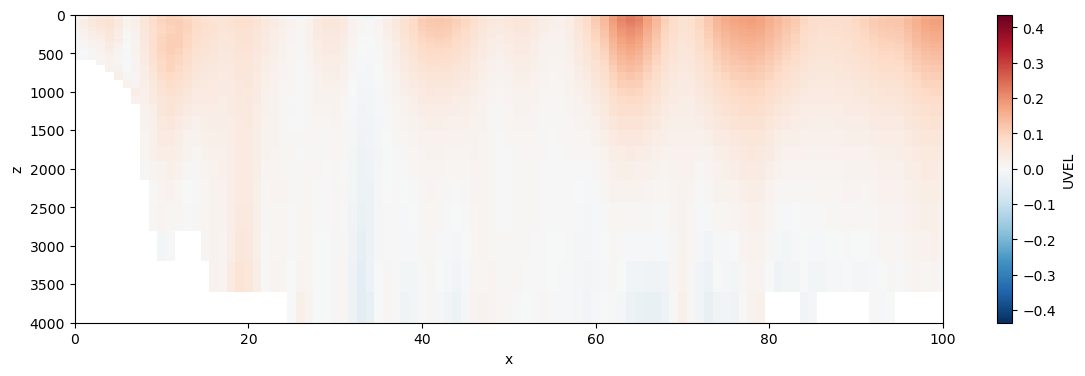

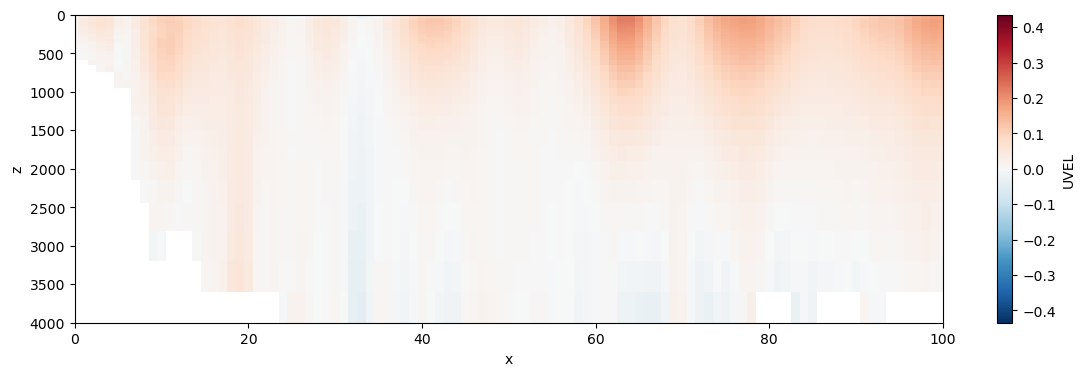

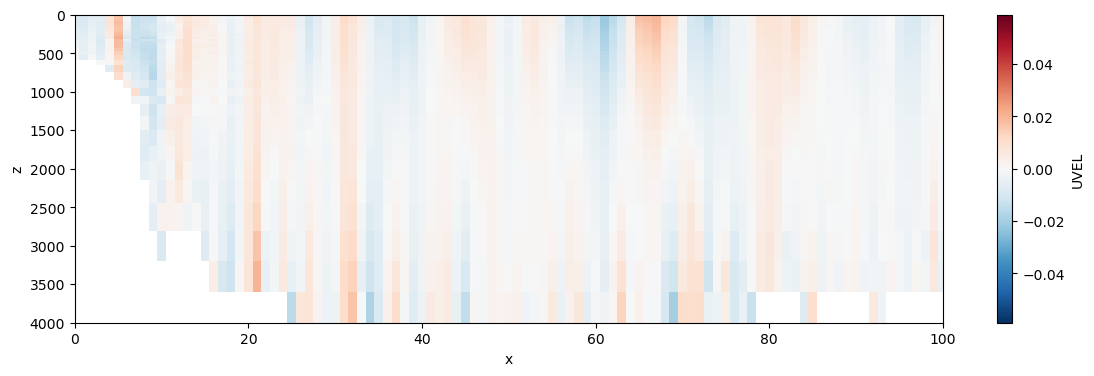

In [72]:
interp.UVEL.plot(figsize=(14,4), xlim=(0,100), ylim=(4000,0))
interp2.UVEL.plot(figsize=(14,4), xlim=(0,100), ylim=(4000,0))
(interp-interp2).UVEL.plot(figsize=(14,4), xlim=(0,100), ylim=(4000,0))

In [62]:
def obcs_horizontal_interp(variable, in_file='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/B-SOSE/climatology/SALT_climatology_202405_m01.nc',
                           mesh_mask='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc',
                           bdy_ind=-2, dim='3D', gtype='T', source_name='SOSE'):

    # from source to destination grid    
    # Destination coordinates file:
    dst_mask_file = xr.open_dataset(mesh_mask).squeeze()
    dst_mask_file = dst_mask_file.isel(y=slice(bdy_ind-1, None)) 
    bdy_lat       = dst_mask_file.nav_lat.max() # Subset to specific indices
    if gtype=='U':
        dst_ds = dst_mask_file.copy()[['tmask','glamt','gphit']]
        dst_ds = dst_ds.assign({'gphif':dst_mask_file.gphif, 'glamf':dst_mask_file.glamf})
    elif gtype=='U':
        dst_ds = dst_mask_file.copy()[['umask','glamu','gphiu']] # bounds should be based on v points of i -- i+1, j-1 -- j
        dst_ds = dst_ds.rename({'umask':'tmask', 'glamu':'glamt', 'gphiu':'gphit'})
        dst_ds = dst_ds.assign({'gphif':dst_mask_file.gphiv, 'glamf':dst_mask_file.glamv})
    elif gtype=='V':
        dst_ds = dst_mask_file.copy()[['vmask','glamv','gphiv']] # bounds should be based on v points of i-1 --- i, j -- j+1
        dst_ds = dst_ds.rename({'vmask':'tmask', 'glamv':'glamt', 'gphiv':'gphit'})
        dst_ds = dst_ds.assign({'gphif':dst_mask_file.gphiu, 'glamf':dst_mask_file.glamu})
        
    # Source 
    if variable=='UVEL':
        name_remapping = {'XG':'lon', 'YC':'lat', 'Z':'depth'}
    elif variable=='VVEL':
        name_remapping = {'XC':'lon', 'YG':'lat', 'Z':'depth'}
    else:
        if dim=='2D':   name_remapping = {'XC':'lon', 'YC':'lat'}
        elif dim=='3D': name_remapping = {'XC':'lon', 'YC':'lat', 'Z':'depth'}

    source_var = xr.open_dataset(f'{in_file}').rename(name_remapping).sel(lat=slice(-90, -48))
    if source_var.lon.max() > 180: # Convert longitudes from 0-360 to -180 to 180 
        source_var['lon'] = fix_lon_range(source_var.lon)
        source_var        = source_var.sortby('lon')
    source_var    = source_var.sel(lat=slice(bdy_lat-2, bdy_lat+2)) 
    source_ind    = np.argmin(np.abs(source_var.lat.values - bdy_lat.values)) # subset to specific indices
    source_var    = xr.where(source_var[variable].isel(lat=slice(source_ind-1, source_ind+2)) ==0,
                             np.nan, source_var.isel(lat=slice(source_ind-1, source_ind+2)))

    #### Main interpolation #####
    print(f"Horizontally interpolating variable {variable} at each depth level from {source_name} to NEMO grid")
    datasets = []
    if dim=='3D':   z_levels = range(source_var.depth.size)
    elif dim=='2D': z_levels = [0]

    for dl in tqdm.tqdm(z_levels): # Loop over all source dataset depth levels:
        if source_name == 'SOSE':
            var_source = mask_SOSE_variable(variable, source_var, source_var[variable], depth_level=dl, dim=dim)

            # Now wrap up into a new Dataset
            source_ds = xr.Dataset({'lon':source_var['lon'], 'lat':source_var['lat'], variable:var_source})

            # Interpolate slices of depth levels along lat-lon (horizontally)
            interp_src = interp_latlon_cf(source_ds, dst_ds, pster_src=False, 
                                          periodic_src=True, periodic_nemo=True, method='conservative')

            datasets.append(interp_src.isel(y=slice(1,2))) # since the horizontal slice went from bdy_ind-1 to bdy_ind+1 

    if dim == '3D':
       source_interpolated = xr.concat(datasets, dim='z').assign_coords(z=np.abs(source_var.depth.values[0:dl+1]))
    elif dim == '2D':
       source_interpolated = interp_src

    return source_interpolated


In [ ]:
def create_bcs(variable, in_file, out_file,
               source='SOSE',
               source_coord='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/B-SOSE/climatology/SALT_climatology_m01.nc',
               nemo_coord  ='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/coordinates_AIS.nc',
               nemo_mask   ='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20231025.nc',
               salt_file   ='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/B-SOSE/climatology/SALT_climatology_m01.nc',
               folder      ='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/boundary-conditions/B-SOSE/',
               fill_value  = np.nan,
               land_value  = np.nan,
               bdy_ind     = 451,
               grid_type   = 'T'):

    # Check number of dimensions of variable (2D or 3D):
    dimension = f"{len(xr.open_dataset(f'{in_file}')[variable].dims)}D"

    # Specify coordinate names:
    if source=='SOSE':
        if variable=='UVEL':
            if dimension=='3D': name_remapping = {'XG':'lon', 'YC':'lat', 'Z':'depth'}
        elif variable=='VVEL':
            if dimension=='3D': name_remapping = {'XC':'lon', 'YG':'lat', 'Z':'depth'}
        else:
            if dimension=='2D':   name_remapping = {'XC':'lon', 'YC':'lat'}
            elif dimension=='3D': name_remapping = {'XC':'lon', 'YC':'lat', 'Z':'depth'}

    # Dictionary specifying file names and locations for subsequent functions:
    interp_info = {'source': source, 'variable': variable, 'nemo_coord': nemo_coord,
                   'nemo_mask': nemo_mask, 'source_coord': source_coord, 'salt_file': salt_file,
                   'dim': dimension, 'renaming': name_remapping}

    # Horizontally interpolate source dataset to NEMO grid:
    ics_obcs_horizontal_interp(interp_info, in_file, f'{folder}temp/{source}-{variable}-BC-horizontal-interp.nc', 
                               ln_obcs=True, bdy_ind=bdy_ind)

    # # take a slice of the nemo mask:
    # nemo_coord_ds = xr.open_dataset(f'{nemo_coord}')
    # nemo_mask_ds  = xr.open_dataset(f'{nemo_mask}').isel(y=[bdy_ind])

    # if dimension=='3D':
    #    # Vertically interpolate the above horizontally interpolated dataset to NEMO grid:
    #    vertical_interp(interp_info, f'{folder}temp/{source}-{variable}-BC-horizontal-interp.nc', \
    #                    f'{folder}temp/{source}-{variable}-BC-vertical-interp.nc', ln_obcs=True, bdy_ind=bdy_ind)
    #    source_interp = xr.open_dataset(f'{folder}temp/{source}-{variable}-BC-vertical-interp.nc')
    # elif dimension=='2D':
    #    # Fill areas that are masked in source dataset but not in NEMO with nearest neighbours:
    #    source_interp = xr.open_dataset(f'{folder}temp/{source}-{variable}-BC-horizontal-interp.nc').isel(y=1)

    # # Fill areas that are masked in source dataset but not in NEMO with nearest neighbours:
    # source_extended = fill_ocean(source_interp, variable, nemo_mask_ds, dim=dimension, niter=100, fill_val=fill_value, grid=grid_type)
    # source_extended[variable] = source_extended[variable].roll(x=-1)

    # # Final processing (fill NaNs with a real value and shift very deepest grid cell value):
    # if ~np.isnan(land_value):
    #     source_extended[variable] = xr.where(np.isnan(source_extended[variable]), land_value, source_extended[variable])
    #     #source_extended[variable] = xr.where(np.abs(source_extended[variable]) < 1e-4, land_value, source_extended[variable]) # for sea ice masking
    # else:
    #     source_extended[variable] = xr.where(np.isnan(source_extended[variable]), 9999, source_extended[variable])
    # if dimension=='3D':
    #     source_extended[variable] = xr.where(source_extended.z == source_extended.z[-1], source_extended[variable].isel(z=-2), source_extended[variable])
    #     source_extended[variable] = ('time_counter','deptht','y','x'), source_extended[variable].values[np.newaxis, ...]
    # elif dimension=='2D':
    #     source_extended[variable] = ('time_counter','y','x'), source_extended[variable].values[np.newaxis, ...]

    # # Write output to file:
    # # TO DO: replace x, y with normal index values and add nav_lon, nav_lat of boundary to dataset as variables
    # source_extended.assign_coords(x=nemo_mask_ds.nav_lon.isel(y=0).values, y=[nemo_mask_ds.nav_lat.isel(x=0,y=0).values]).to_netcdf(f'{out_file}', \
    #                                                                                                                               unlimited_dims='time_counter')
    return


## Other stuff

In [ ]:
bdy_ind = nemo_mesh.y.size-1

In [100]:
for var in ['AbsSal', 'ConsTemp', 'UVEL', 'VVEL','SSH','aice','sithick','sisnthick']:
    print(var)
    for month in range(2,13):
        dso = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_{var}_test4_y1850m{month:02}.nc')
        dso_array  = np.copy(dso[var].values)
        slice_fill = dso[var].isel(x=451).values
        if var in ['AbsSal', 'ConsTemp', 'UVEL', 'VVEL']:
            for x in range(0,dso.x.size):
                dso_array[:,:,:,x] = slice_fill

            if var in ['AbsSal','ConsTemp']:
                dso_array = xr.where(nemo_mesh.tmask.isel(y=slice(bdy_ind-1,bdy_ind)).values==1, dso_array, 9999)
            elif var == 'UVEL':
                dso_array = xr.where(nemo_mesh.umask.isel(y=slice(bdy_ind-1,bdy_ind)).values==1, dso_array, 9999)
            elif var == 'VVEL':
                dso_array = xr.where(nemo_mesh.vmask.isel(y=slice(bdy_ind-2,bdy_ind-1)).values==1, dso_array, 9999)
                
            dsn = dso.copy()
            dsn[var] = (('time_counter','deptht','y','x'), dso_array)
        else:
            for x in range(0,dso.x.size):
                dso_array[:,:,x] = slice_fill
            
            # dso_array = xr.where(dso[var].values==9999, 9999, dso_array) ## for now lets ignore the 2d variables land values
            dsn = dso.copy()
            dsn[var] = (('time_counter','y','x'), dso_array)
            
        dsn.to_netcdf(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_{var}_test8_y1850m{month:02}.nc')

AbsSal
ConsTemp
UVEL
VVEL
SSH
aice
sithick
sisnthick


## Organize functions for new CESM2 initial conditions creation

In [172]:
# Helper function to 
def fill_and_reshape(ds, variable, land_fill_val=9999, dim='3D'):
    # Fill nan values with an unrealistic constant value
    ds[variable] = xr.where(np.isnan(ds[variable]), land_fill_val, ds[variable])

    # Reshape array
    if dim=='3D':
        ds[variable] = xr.where(ds.z == ds.z[-1], ds[variable].isel(z=-2), ds[variable]) # fill bottom grid cell with value from above it
        ds[variable] = ('time_counter','deptht','y','x'), ds[variable].values[np.newaxis, ...] # add a time axis
    elif dim=='2D':
        ds[variable] = ('time_counter','y','x'), ds[variable].values[np.newaxis, ...] # add a time axis           
    return ds

In [173]:
def regrid_cesm2_nemo_cf(cesm2_source, variable, dim='3D'):

    if dim=='3D':
        with open('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/cf-regridding/linear-regrid-CESM2-eANT025-z0-z70.pickle','rb') as file:
            rgo1 = pickle.load(file)
            ds1  = regrid_array_cf(cesm2_source, rgo1, key_3d=True, method='linear', src_cyclic=True, dst_cyclic=True)
        with open('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/cf-regridding/linear-regrid-CESM2-eANT025-z70-z121.pickle','rb') as file:
            rgo2 = pickle.load(file)
            ds2  = regrid_array_cf(cesm2_source, rgo2, key_3d=True, method='linear', src_cyclic=True, dst_cyclic=True)
        # combine pickles from both interpolations
        ds_array = np.vstack((ds1.array, ds2.array))
    elif dim=='2D':
        with open('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/cf-regridding/linear-regrid-CESM2-eANT025-z0.pickle','rb') as file:
            rgo1 = pickle.load(file)
            ds1  = regrid_array_cf(cesm2_source, rgo1, key_3d=False, method='linear', src_cyclic=True, dst_cyclic=True)
            ds_array = ds1.array

    # Replace zeros with NaN
    ds_array_masked = xr.where(ds_array==0, np.nan, ds_array)
    if dim=='3D':
        ds = xr.Dataset({variable:(('z','y','x'), ds_array_masked)})
    elif dim=='2D':
        ds = xr.Dataset({variable:(('y','x'), ds_array_masked)})

    return ds

In [174]:
def regrid_sose_nemo_cf(sose_source, variable, dim='3D'):

    if dim=='3D':
        with open('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/cf-regridding/linear-regrid-SOSE-eANT025.pickle','rb') as file:
            rgo1 = pickle.load(file)
            ds1  = regrid_array_cf(sose_source, rgo1, key_3d=True, method='linear', src_cyclic=True, dst_cyclic=True)
    elif dim=='2D':
        with open('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/cf-regridding/linear-regrid-SOSE-eANT025-z0.pickle','rb') as file:
            rgo1 = pickle.load(file)
            ds1  = regrid_array_cf(sose_source, rgo1, key_3d=False, method='linear', src_cyclic=True, dst_cyclic=True)
            
    ds_array = ds1.array

    # Replace zeros with NaN
    ds_array_masked = xr.where(ds_array==0, np.nan, ds_array)
    if dim=='3D':
        ds = xr.Dataset({variable:(('z','y','x'), ds_array_masked)})
    elif dim=='2D':
        ds = xr.Dataset({variable:(('y','x'), ds_array_masked)})

    return ds

In [181]:
def sose_bcs(variable, varname, dim='3D', land_fill_val=9999, gtype='T',
             sose_folder='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/B-SOSE/climatology/',
             out_folder='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/boundary-conditions/B-SOSE/',
             nemo_mask='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'):
    if dim=='3D':
        name_remapping = {varname:'data', 'Z':'z'}
    elif dim=='2D':
        name_remapping = {varname:'data'}

    # load NEMO grid:
    nemo_mask_ds = xr.open_dataset(nemo_mask)

    for month in range(1,13):
        sose_ds_month = xr.open_dataset(f'{sose_folder}{variable}_climatology_202405_m{month:02}.nc')
        sose_ds_month['XC'] = fix_lon_range(sose_ds_month['XC']) # convert from 0-360 to degrees east
        sose_ds_month = sose_ds_month.assign({'x':(('x'), np.arange(1,sose_ds_month.XC.size+1)),
                                              'y':(('y'), np.arange(1,sose_ds_month.YC.size+1))})
        sose_lon, sose_lat  = np.meshgrid(sose_ds_month.XC, sose_ds_month.YC)
        sose_ds_month = sose_ds_month.assign({'lon':(('y', 'x'), sose_lon), 'lat':(('y','x'), sose_lat)})
        sose_source   = sose_ds_month.assign({'depth':(('Z'), sose_ds_month.Z.values)}).rename(name_remapping)
    
        # interpolate SOSE grid to NEMO grid and fill empty values with connected nearest neighbour
        sose_interp   = regrid_sose_nemo_cf(sose_source, varname, dim=dim)
        # extract the boundary layer:
        bdy_ind = -2;
        if gtype=='V':
            slice_bdy = slice(bdy_ind-1,bdy_ind);
        else:
            slice_bdy = slice(bdy_ind,bdy_ind+1);
        sose_interp   = sose_interp.isel(y=slice_bdy)
        sose_extended = fill_ocean(sose_interp, varname, nemo_mask_ds.isel(y=slice_bdy), 
                                   dim=dim, niter=400, fill_val=np.nan, grid=gtype)
    
        # Fill land values with an unrealistic constant value and add a time dimension to the shape
        SOSE_bcs = fill_and_reshape(sose_extended, varname, land_fill_val=land_fill_val, dim=dim)
    
        # Write output to file:
        SOSE_bcs.to_netcdf(f'{out_folder}SOSE_BCs_{variable}_202409_m{month:02}.nc', unlimited_dims='time_counter')

    return

In [176]:
def cesm2_bcs(variable, exp='LE2', ens='1011.001', dim='3D', year=1850, land_fill_val=9999, gtype='T',
              cesm2_folder='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/processed/',
              out_folder='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/boundary-conditions/CESM2/LE2/',
              nemo_mask='/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'):
    if dim=='3D':
        name_remapping = {variable:'data', 'TLONG':'lon', 'TLAT':'lat', 'nlat':'y', 'nlon':'x', 'z_t':'z'}
    elif dim=='2D':
        if variable in ['aice','sisnthick','sithick']:
            name_remapping = {variable:'data', 'TLON':'lon', 'TLAT':'lat', 'nj':'y', 'ni':'x'}
        else:
            name_remapping = {variable:'data', 'TLONG':'lon', 'TLAT':'lat', 'nlat':'y', 'nlon':'x'}

    # load NEMO grid:
    nemo_mask_ds = xr.open_dataset(nemo_mask)
    # load CESM2 file and specified month, rename variables:
    cesm2_ds     = xr.open_dataset(f'{cesm2_folder}CESM2-LE2_ens{ens}_{variable}_y{year}.nc')

    if year==1850:
        month_range = range(2,12+1)
    else:
        month_range = range(1,12+1)
    
    for month in month_range:
        cesm2_ds_month = cesm2_ds.isel(time=(cesm2_ds.time.dt.month==month)).isel(time=0)
        if dim=='3D':
            cesm2_ds_month = cesm2_ds_month.assign({'depth':cesm2_ds.z_t})
        cesm2_source = cesm2_ds_month.rename(name_remapping)
    
        # interpolate CESM2 grid to NEMO grid and fill empty values with connected nearest neighbour
        cesm2_interp   = regrid_cesm2_nemo_cf(cesm2_source, variable, dim=dim)
        # extract the boundary layer:
        bdy_ind = -2;
        if gtype=='V':
            slice_bdy = slice(bdy_ind-1,bdy_ind);
        else:
            slice_bdy = slice(bdy_ind,bdy_ind+1);
        cesm2_interp   = cesm2_interp.isel(y=slice_bdy)
        cesm2_extended = fill_ocean(cesm2_interp, variable, nemo_mask_ds.isel(y=slice_bdy), dim=dim, niter=400, fill_val=np.nan, grid=gtype)
        cesm2_extended[variable] = cesm2_extended[variable] #.roll(x=-1) # because of Fortran based indexing
    
        # Fill land values with an unrealistic constant value and add a time dimension to the shape
        CESM2_bcs = fill_and_reshape(cesm2_extended, variable, land_fill_val=land_fill_val, dim=dim)
    
        # Write output to file:
        CESM2_bcs.to_netcdf(f'{out_folder}CESM2-{exp}_ens{ens}_BCs_{variable}_test9_y{year}m{month:02}.nc', unlimited_dims='time_counter')

    return

For now, for the boundary conditions, maybe I should table my new method and continue with the old method but using a better vertical interpolation method than my home-made function

In [195]:
sose_ds.PracSal.where(sose_ds.PracSal!=9999).max() # looks like the interpolation didn't quite work

<xarray.DataArray 'PracSal' ()> Size: 8B
array(0.)

In [183]:
sose_ds = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/boundary-conditions/B-SOSE/SOSE_BCs_SALT_202409_m01.nc')

In [162]:
# ConsTemp, AbsSal
for year in range(1851, 1852):
    print('------ year:', year, '------')
    cesm2_bcs('ConsTemp', year=year, exp='LE2', ens='1011.001', dim='3D', gtype='T')

------ year: 1851 ------
Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:05, 76.68it/s]


Completed filling missing values
Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:03, 98.41it/s]

Completed filling missing values


Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:04, 84.65it/s]


Completed filling missing values
Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:05, 76.60it/s]


Completed filling missing values
Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:04, 86.44it/s]

Completed filling missing values


Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:05, 73.26it/s]


Completed filling missing values
Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:04, 91.53it/s]

Completed filling missing values


Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:04, 79.70it/s]


Completed filling missing values
Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:04, 84.42it/s]


Completed filling missing values
Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:03, 106.79it/s]

Completed filling missing values


Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:04, 90.71it/s]

Completed filling missing values


Filling gaps with connected nearest neighbours


  4%|▍         | 15/400 [00:00<00:04, 90.05it/s]

Completed filling missing values
